ライブラリとファイルのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import evalml

In [2]:
df = pd.read_csv('data/orac_bde.csv')
df = df.iloc[:, 1:]
df.head()

SMILES   HOMO   LUMO    gap          IP  \
0  Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)O)O2 -8.560  0.000  8.560  176.981093   
1                            Oc1ccccc1 -9.235  0.036  9.271  200.170693   
2                           Cc1ccccc1O -9.004  0.155  9.159  193.746273   
3                         Cc1cccc(O)c1 -9.137  0.167  9.304  196.599783   
4                         Cc1ccc(O)cc1 -8.926  0.095  9.021  192.367843   

    DIPOLE  MaxEStateIndex  MinEStateIndex    MolWt  MaxPartialCharge  ...  \
0  4.57857       11.259620       -1.173004  250.294          0.347263  ...   
1  1.30787        8.632222        0.321759   94.113          0.115075  ...   
2  0.74536        8.919259        0.368056  108.140          0.117980  ...   
3  0.91497        8.813056        0.337963  108.140          0.115340  ...   
4  1.55691        8.756667        0.329259  108.140          0.115094  ...   

      Kappa1    Kappa2    Kappa3   LabuteASA   TPSA  FractionCSP3  MolLogP  \
0  12.739315  3.901270  1.635001  106.208644  66.76      0.500000  2.48576   
1   4.186113  1.646196  0.929059   42.225637  20.23      0.000000  1.39220   
2   5.162450  1.864622  0.808017   48.590579  20.23      0.142857  1.70062   
3   5.162450  1.864622  0.997109   48.590579  20.23      0.142857  1.70062   
4   5.162450  1.864622  0.997109   48.590579  20.23      0.142857  1.70062   

     MolMR       BDE    target  
0  67.3076  74.91206  1.000000  
1  28.1068  82.34942  1.757809  
2  32.8438  80.03128  1.168808  
3  32.8438  82.39959  1.635166  
4  32.8438  80.36900  1.020701  

[5 rows x 31 columns]

データの概要をつかむフェーズ(相関行列と散布図行列)
<br>動くのに時間がかかるのでコメントアウトして飛ばしてもよいかも

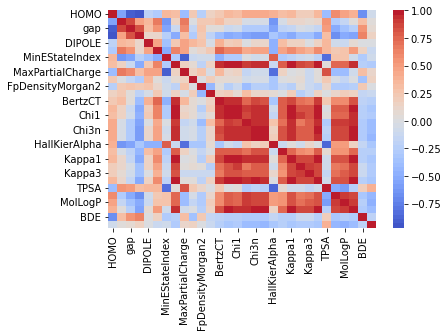

In [3]:
sns.heatmap(df.corr(), cmap=sns.color_palette('coolwarm', 50));

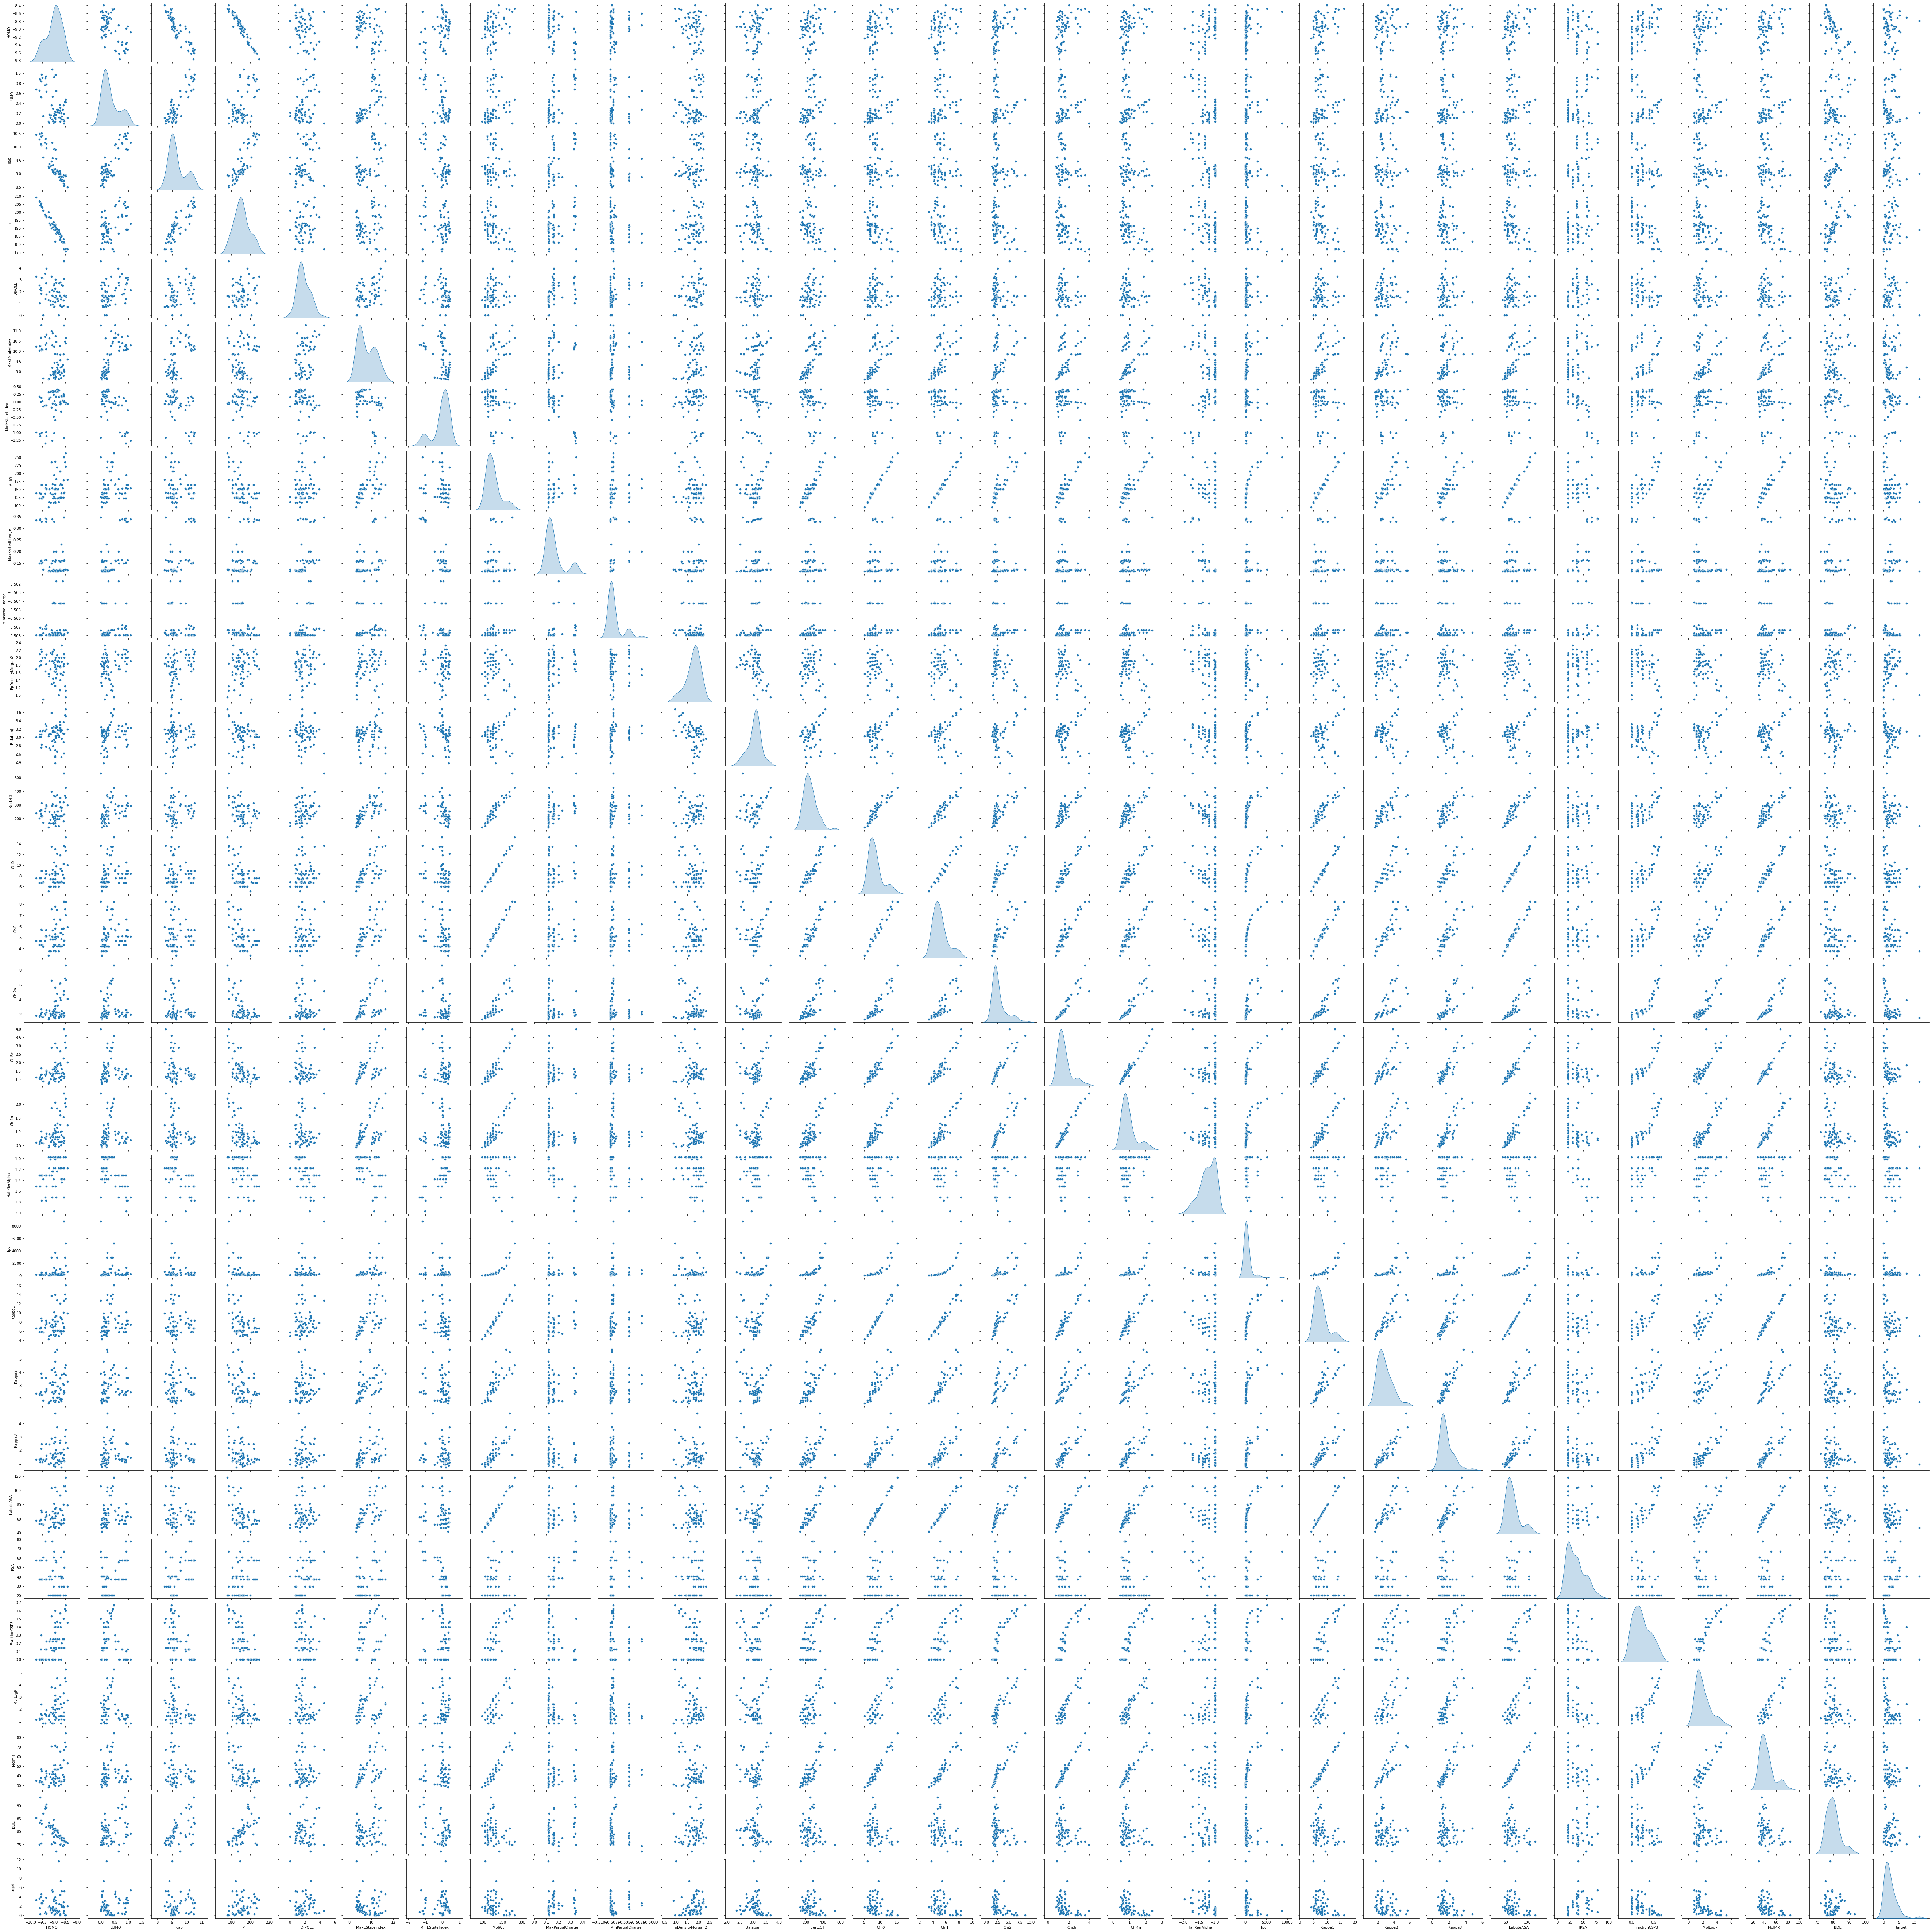

In [4]:
sns.pairplot(df, diag_kind='kde');

前もって削りたい列があればX.dropのcolumnsに追加する
<br>その後は分散と相関係数で変数スクリーニングのフェーズ

In [5]:
X = df.copy()
X.drop(columns=['SMILES','target'], inplace=True)
y = df["target"]
X

HOMO   LUMO     gap          IP   DIPOLE  MaxEStateIndex  MinEStateIndex  \
0  -8.560  0.000   8.560  176.981093  4.57857       11.259620       -1.173004   
1  -9.235  0.036   9.271  200.170693  1.30787        8.632222        0.321759   
2  -9.004  0.155   9.159  193.746273  0.74536        8.919259        0.368056   
3  -9.137  0.167   9.304  196.599783  0.91497        8.813056        0.337963   
4  -8.926  0.095   9.021  192.367843  1.55691        8.756667        0.329259   
..    ...    ...     ...         ...      ...             ...             ...   
65 -8.709  0.315   9.024  183.349013  0.86232        9.836310       -0.008588   
66 -9.563  0.533  10.096  204.763073  2.31543       10.675038        0.013889   
67 -8.864  0.226   9.090  187.331563  2.01731        9.854866        0.413148   
68 -8.937  0.233   9.170  181.817043  1.13083        9.871580       -0.588253   
69 -9.031  0.041   9.072  192.565833  1.18427        8.899063        0.312789   

      MolWt  MaxPartialCharge  MinPartialCharge  ...          Ipc     Kappa1  \
0   250.294          0.347263         -0.507381  ...  8738.767939  12.739315   
1    94.113          0.115075         -0.507967  ...    47.197253   4.186113   
2   108.140          0.117980         -0.507687  ...    72.495266   5.162450   
3   108.140          0.115340         -0.507957  ...    64.052487   5.162450   
4   108.140          0.115094         -0.507967  ...    70.798924   5.162450   
..      ...               ...               ...  ...          ...        ...   
65  206.329          0.118819         -0.507654  ...  1105.096418  12.091327   
66  136.150          0.159303         -0.507966  ...   180.912515   6.805075   
67  218.340          0.118800         -0.507655  ...  2895.515699  12.827751   
68  236.355          0.118800         -0.507655  ...  3666.418032  14.042578   
69  134.178          0.115095         -0.507967  ...   210.075617   6.874155   

      Kappa2    Kappa3   LabuteASA   TPSA  FractionCSP3  MolLogP    MolMR  \
0   3.901270  1.635001  106.208644  66.76      0.500000  2.48576  67.3076   
1   1.646196  0.929059   42.225637  20.23      0.000000  1.39220  28.1068   
2   1.864622  0.808017   48.590579  20.23      0.142857  1.70062  32.8438   
3   1.864622  0.997109   48.590579  20.23      0.142857  1.70062  32.8438   
4   1.864622  0.997109   48.590579  20.23      0.142857  1.70062  32.8438   
..       ...       ...         ...    ...           ...      ...      ...   
65  3.549844  2.740490   93.145174  20.23      0.571429  3.98720  65.5068   
66  2.518544  1.345016   59.117043  37.30      0.125000  1.59480  38.1113   
67  5.737807  3.726898   98.820513  20.23      0.466667  4.55052  69.9238   
68  5.544037  4.779265  104.304350  40.46      0.600000  3.74532  71.4076   
69  3.062884  1.621724   60.630860  20.23      0.111111  2.12070  42.0078   

         BDE  
0   74.91206  
1   82.34942  
2   80.03128  
3   82.39959  
4   80.36900  
..       ...  
65  78.50882  
66  84.36906  
67  80.38188  
68  81.17659  
69  80.95534  

[70 rows x 29 columns]

In [6]:
sel = VarianceThreshold(threshold=0.05)
sel.fit(X)
X = X.loc[:, sel.get_support()]
print(X.shape)

(70, 26)


In [7]:
def select_corr(df, threshold=0.95):
    corr = abs(df.corr())
    columns = df.columns
    
    for i in range(len(columns)):
        corr.iloc[i, i] = 0
        
    while True:
        revised_column=corr.columns
        max_corr = 0
        query = None
        another = None
        
        max_search = corr.max()
        max_corr = max_search.max()
        query = max_search.idxmax()
        another = corr[query].idxmax()
        
        if max_corr < threshold:
            break
        else:
            delete = None
            save = None
            
            if sum(corr[query]) <= sum(corr[another]):
                delete = another
                save = query
            else:
                delete = query
                save = another
            print(delete)
            corr.drop([delete], axis=0, inplace=True)
            corr.drop([delete], axis=1, inplace=True)
            df.drop([delete], axis=1, inplace=True)
    
    return df

In [8]:
select_corr(X, threshold=0.95)
X = X.loc[:, X.columns]
print(X.shape)

Chi0
LabuteASA
MolWt
Chi3n
MolMR
Kappa1
IP
(70, 19)


データ分割と標準化
<br>test_size=0.2くらいが標準の相場,もっと減らしてもよい

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [10]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)

EvalMLを動かして最も結果の良かったモデルを示す

In [11]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='regression', objective='root mean squared error', 
                      additional_objectives=['mae', 'r2'], max_iterations=100, ensembling=True, 
                      random_seed=41, n_jobs=-1, verbose=True)
automl.search()

Generating pipelines to search over...
Ensembling will run at the 44 iteration and every 35 iterations after that.
7 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Root Mean Squared Error. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 100 pipelines. 
Allowed model families: linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
Mean Baseline Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.031

*****************************
* Evaluating Batch Number 1 *
*****************************



C:\Users\nezum\anaconda3\envs\evalml2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.877e+01, tolerance: 2.001e-02

C:\Users\nezum\anaconda3\envs\evalml2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+01, tolerance: 9.918e-03



Elastic Net Regressor w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.174


C:\Users\nezum\anaconda3\envs\evalml2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+01, tolerance: 1.895e-02



XGBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.973
LightGBM Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.031
CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.979
Random Forest Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.808
Decision Tree Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.394
Extra Trees Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.651

*****************************
* Evaluating Batch Number 2 *
*****************************

Extra Trees Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.623
Extra Trees Regressor w/ Imputer


******************************
* Evaluating Batch Number 13 *
******************************

CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.677
CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.864
CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.809
CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.914
CatBoost Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.790

******************************
* Evaluating Batch Number 14 *
******************************

LightGBM Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.742
LightGBM Regressor w/ Imputer:
	Starting cross validation
	Finished cros

In [12]:
automl.rankings

id                                      pipeline_name  search_order  \
0   83                   Extra Trees Regressor w/ Imputer            83   
5   79               Stacked Ensemble Regression Pipeline            79   
16  59                      CatBoost Regressor w/ Imputer            59   
19  54                       XGBoost Regressor w/ Imputer            54   
22  28                      LightGBM Regressor w/ Imputer            28   
23  33  Elastic Net Regressor w/ Imputer + Standard Sc...            33   
33  86                 Random Forest Regressor w/ Imputer            86   
56  41                 Decision Tree Regressor w/ Imputer            41   
80   0                  Mean Baseline Regression Pipeline             0   

    mean_cv_score  standard_deviation_cv_score  validation_score  \
0        1.621532                     0.616879          0.983844   
5        1.622477                     0.689574          0.980356   
16       1.677148                     0.768477          0.988970   
19       1.711491                     0.622364          1.013150   
22       1.735063                     0.518743          1.297955   
23       1.736854                     0.673668          1.149497   
33       1.781187                     0.618587          1.163528   
56       1.820543                     0.463743          1.379865   
80       2.030678                     0.657983          1.553188   

    percent_better_than_baseline  high_variance_cv  \
0                      20.148260             False   
5                      20.101704             False   
16                     17.409451             False   
19                     15.718269             False   
22                     14.557439             False   
23                     14.469250             False   
33                     12.286110             False   
56                     10.348016             False   
80                      0.000000             False   

                                           parameters  
0   {'Imputer': {'categorical_impute_strategy': 'm...  
5   {'Linear Pipeline - Imputer': {'categorical_im...  
16  {'Imputer': {'categorical_impute_strategy': 'm...  
19  {'Imputer': {'categorical_impute_strategy': 'm...  
22  {'Imputer': {'categorical_impute_strategy': 'm...  
23  {'Imputer': {'categorical_impute_strategy': 'm...  
33  {'Imputer': {'categorical_impute_strategy': 'm...  
56  {'Imputer': {'categorical_impute_strategy': 'm...  
80       {'Baseline Regressor': {'strategy': 'mean'}}

In [13]:
best_pipeline = automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


************************************
* Extra Trees Regressor w/ Imputer *
************************************

Problem Type: regression
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : median
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Regressor
	 * n_estimators : 315
	 * max_features : auto
	 * max_depth : 10
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 1.5 seconds

Cross Validation
----------------
             Root Mean Squared Error   MAE    R2 # Training # Validation
0                              0.984 0.821 0.573         37           19
1                              2.215 1.228 0.351         37           19
2                              1.666 1.178 0.102         38           18
mean                           1.622 1.076 0.342          -            -


In [14]:
best_pipeline.score(X_test, y_test, objectives=['root mean squared error', 'mae', 'r2'])

OrderedDict([('Root Mean Squared Error', 1.197786268750575),
             ('MAE', 1.0044337560799095),
             ('R2', 0.05510545280114998)])

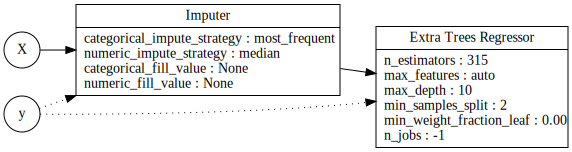

In [15]:
best_pipeline.graph()

In [16]:
from evalml.model_understanding import graph_prediction_vs_actual
y_pred = best_pipeline.predict(X_test)
y_predtrain = best_pipeline.predict(X_train)
graph_prediction_vs_actual(y_test, y_pred)

In [17]:
graph_prediction_vs_actual(y_train, y_predtrain)

In [18]:
from evalml.model_understanding.graphs import graph_permutation_importance
graph_permutation_importance(best_pipeline, X_train, y_train, 'root mean squared error')

In [19]:
from evalml.model_understanding.permutation_importance import calculate_permutation_importance
df_imp = calculate_permutation_importance(best_pipeline, X_train, y_train, 'root mean squared error', n_jobs=-1)
df_imp[:10]

feature  importance
0              TPSA    0.942547
1     HallKierAlpha    0.792269
2               BDE    0.680553
3            DIPOLE    0.382743
4           MolLogP    0.300430
5             Chi2n    0.296876
6  FpDensityMorgan2    0.283195
7             Chi4n    0.281398
8              HOMO    0.201488
9              Chi1    0.182249

以下、選ばれたモデルいよってはバグります。分類問題の時もバグります

In [20]:
from evalml.model_understanding.prediction_explanations.explainers import explain_predictions
explain_predictions(best_pipeline, X_train, y_train, indices_to_explain=[0], include_explainer_values=True, include_expected_value=True, 
                    top_k_features=7, output_format='dataframe', algorithm='shap')

feature_names  feature_values qualitative_explanation  \
0             BDE       -0.118521                       +   
1  MinEStateIndex        0.940370                       +   
2         MolLogP       -0.047351                       +   
3            LUMO       -0.357878                       -   
4          DIPOLE       -0.448135                       -   
5   HallKierAlpha        0.888427                      --   
6            TPSA       -0.920400                      --   

   quantitative_explanation  prediction_number  
0                  0.072936                  0  
1                  0.057273                  0  
2                  0.036800                  0  
3                 -0.051184                  0  
4                 -0.083474                  0  
5                 -0.592327                  0  
6                 -0.626267                  0

In [21]:
from evalml.model_understanding.force_plots import graph_force_plot

rows_to_explain = [0]

results = graph_force_plot(best_pipeline, rows_to_explain=rows_to_explain,
                           training_data=X_train, y=y_train)

for result in results:
    for cls in result:
        display(result[cls]["plot"])